# **Pima Indians Diabetes**

**Life cycle of Machine learning Project**

* Understanding the Problem Statement
* Data Collection
* Exploratory data analysis
* Data Cleaning
* Data Pre-Processing
* Model Training 
* Choose best model

# About
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

## 1) Problem statement

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

## 2) Data Collection

https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

## Importing the necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

**Import the CSV Data as Pandas DataFrame**

In [2]:
df = pd.read_csv("diabetes.csv")

**Show Top 5 Records**

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Shape of the dataset**

In [4]:
df.shape

(768, 9)

**Summary of the dataset**

In [5]:
# Display summary statistics for a dataframe
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Check Datatypes in the dataset**

In [6]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## 3. EXPLORING DATA

In [7]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 9 numerical features : ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

We have 0 categorical features : []


## **Insights**
### **Dataset Overview**
- Total entries: 768 rows × 9 columns
- No missing values: All columns have 768 non-null values.
- Data types: 7 integer columns, 2 float columns.

### **1. Glucose, BloodPressure, SkinThickness, Insulin, and BMI have minimum values of 0**  
This is unrealistic for some features like Glucose, BloodPressure, BMI, and especially Insulin.  
These zeros likely indicate missing or invalid measurements, and may need imputation or removal during preprocessing.

### **2. Distribution of Key Features:**
- **Glucose:**  
Mean: ~121, Max: 199  
25% of the data has Glucose ≤ 99

- **Insulin:**  
Mean: ~80, Max: 846, Std Dev: 115  
Highly skewed, wide range → needs normalization

- **BMI:**  
Mean: ~32, Min: 0 (invalid), Max: 67.1

3. **Pregnancies and Age:**
- Pregnancies:  
Mean: ~3.8, Max: 17  
Shows a wide range; higher values could indicate risk factors

- **Age:**  
Mean: ~33, Max: 81  
Younger population, but with wide variability

4. **Outcome Distribution:**  
Mean: ~0.35  
This implies around 35% of the patients are diabetic (Outcome = 1), and 65% are non-diabetic, indicating class imbalance.

5. **Feature Spread:**  
Some features have high variance (e.g., Insulin), while others like DiabetesPedigreeFunction are more concentrated.  
Standardization or normalization is essential for modeling.


## Univariate Analysis

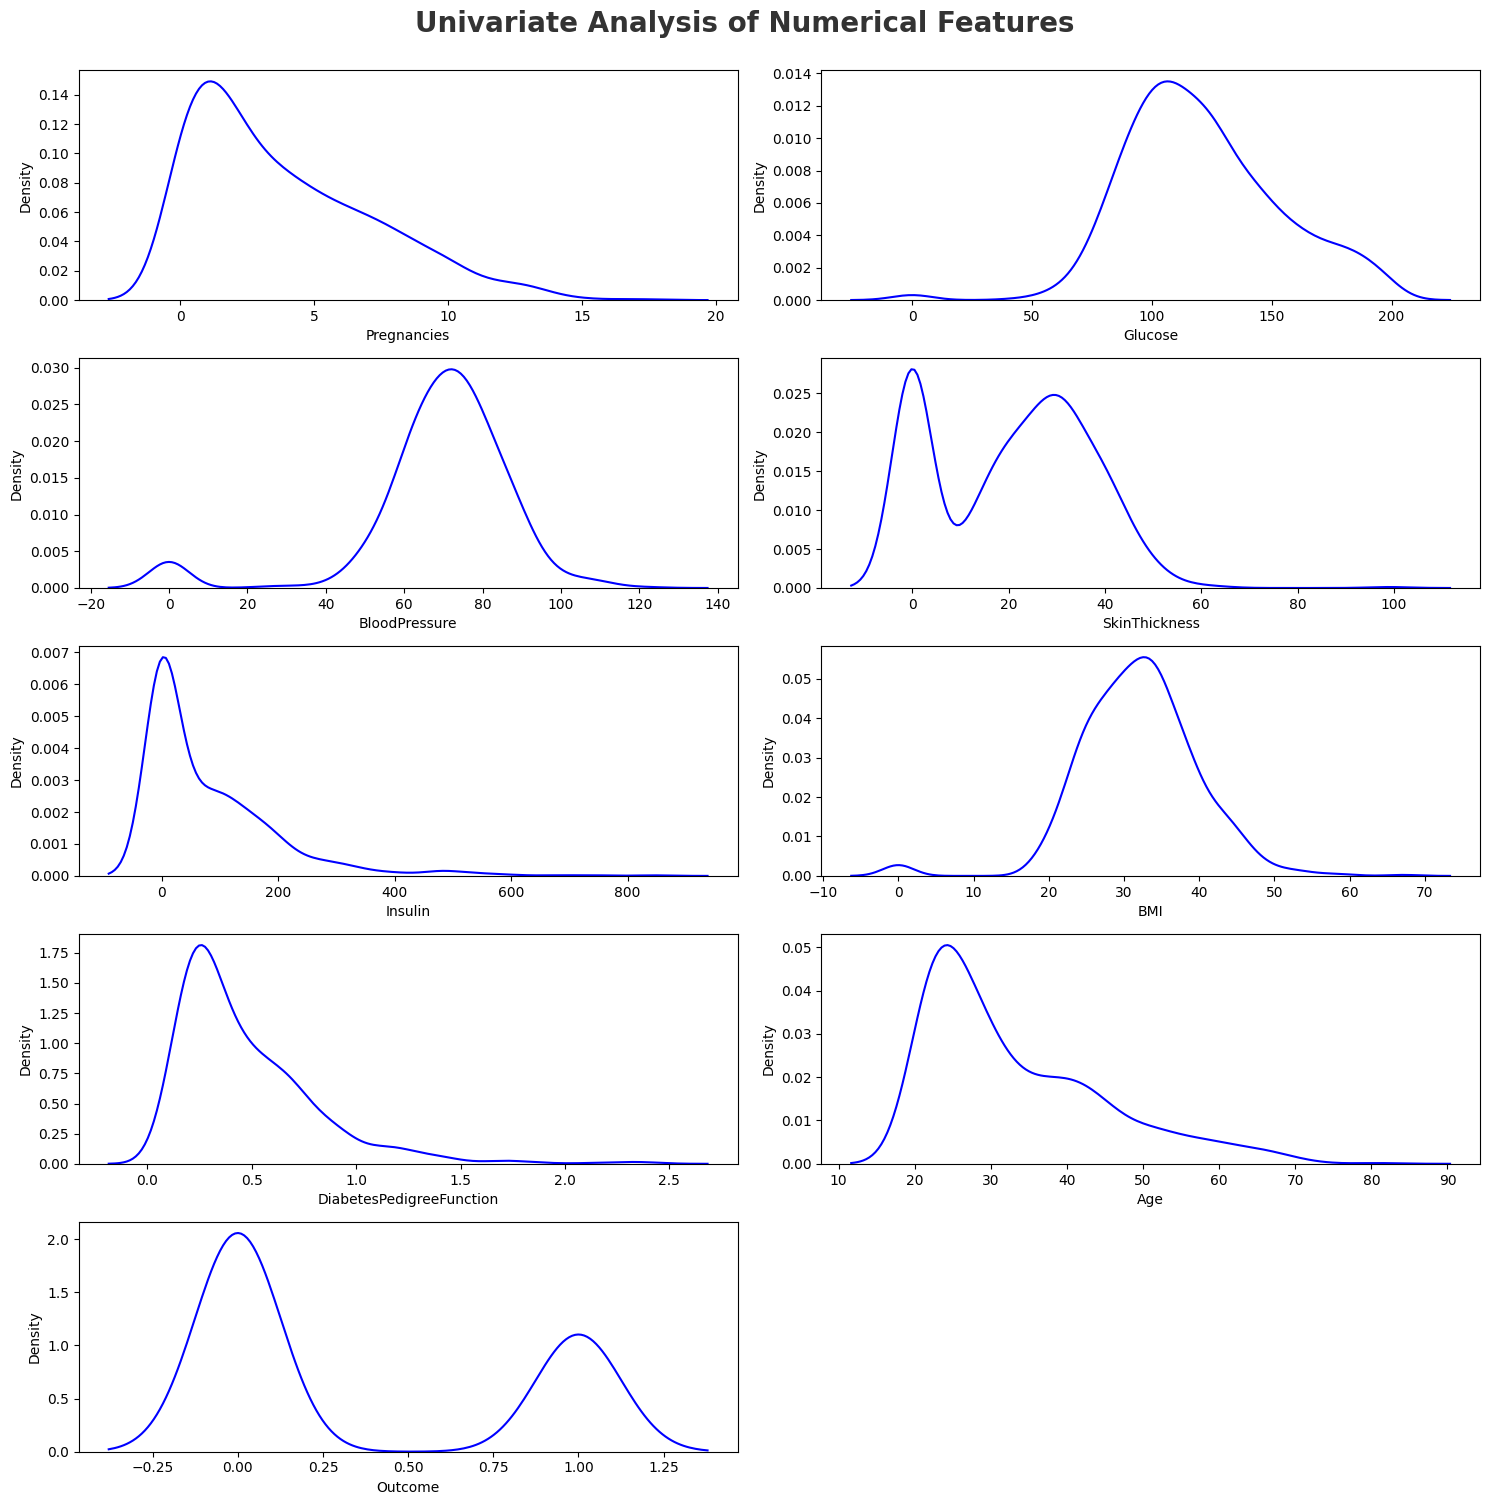

In [8]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 2, i+1)
    sns.kdeplot(x=df[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()
    
# save plot
# plt.savefig('./images/Univariate_Num.png')

# **Insights**

1. **Pregnancies:**  
Right-skewed distribution.  
Most women had fewer than 5 pregnancies.  
A few had 10+ pregnancies, indicating outliers or high-risk groups.

2. **Glucose:**  
Nearly normal distribution but slightly skewed to the left.  
No sharp peak at zero, which suggests missing values (if any) may have been handled.  
Most values cluster between 80–160, which aligns with typical glucose levels.  

3. **BloodPressure:**  
Bimodal distribution — a smaller peak near 0 suggests missing or invalid entries (blood pressure of 0 is not physiologically possible).  
Majority of values are around 60–80, which is reasonable.

4. **SkinThickness:**  
Clear spike at 0, indicating many missing or unmeasured values.  
Remaining distribution appears normal between 20–40 mm.  

5. **Insulin:**  
Strong spike at 0 — majority of insulin values are zero, which is likely missing data.  
Long right tail up to 800+, showing a highly skewed distribution.  
Needs imputation or transformation (e.g., log scale) for modeling.  

6. **BMI (Body Mass Index):**  
Unimodal and right-skewed.  
Most individuals have BMI between 25–40, indicating a tendency toward overweight or obesity.  
Some entries below 10 likely indicate invalid or missing values.

7. **Diabetes Pedigree Function:**  
Right-skewed with most values between 0 and 0.5.  
Long tail suggests a few individuals with high genetic predisposition to diabetes.

8. **Age:**  
Right-skewed distribution.  
Most participants are aged 20–40, fewer elderly participants.  
A long tail extends to 80+, indicating inclusion of older high-risk individuals.

## Multivariate Analysis

In [9]:
discrete_features = ['Pregnancies']
continuous_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

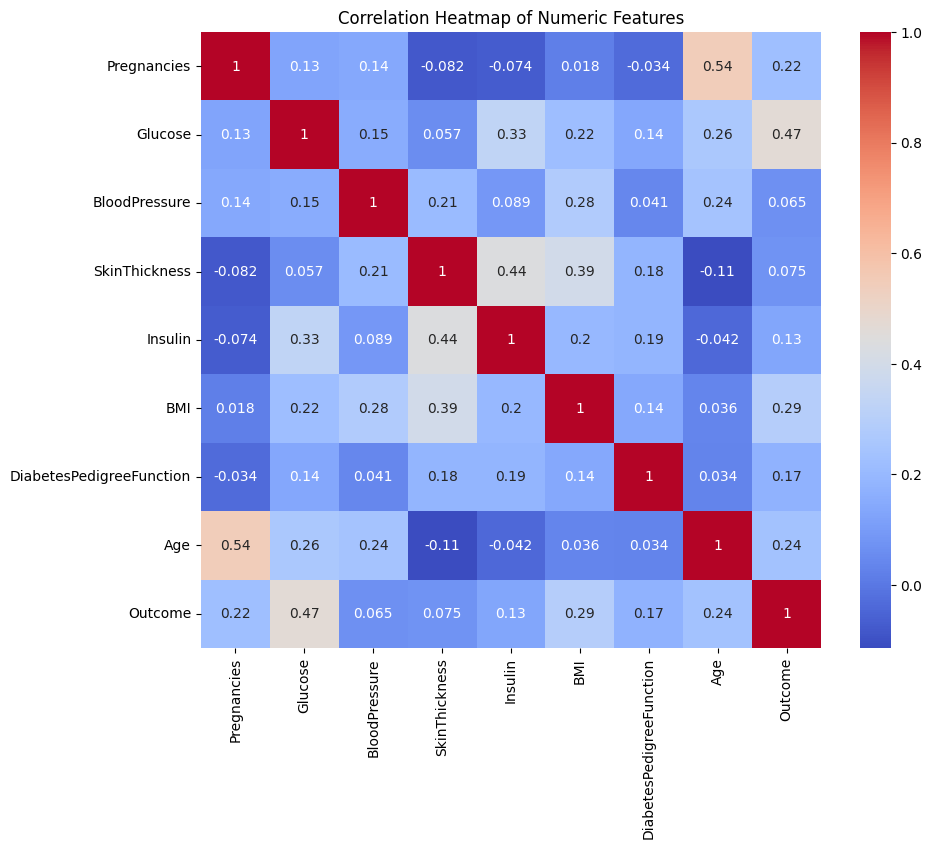

In [10]:
corr_matrix = df[numeric_features].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

# **Insights**
No extreme multicollinearity is observed (i.e., no values > 0.8)

### Checking Null Values

In [11]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
continues_features=[feature for feature in numeric_features if len(df[feature].unique())>=10]
print('Num of continues features :',continues_features)

Num of continues features : ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


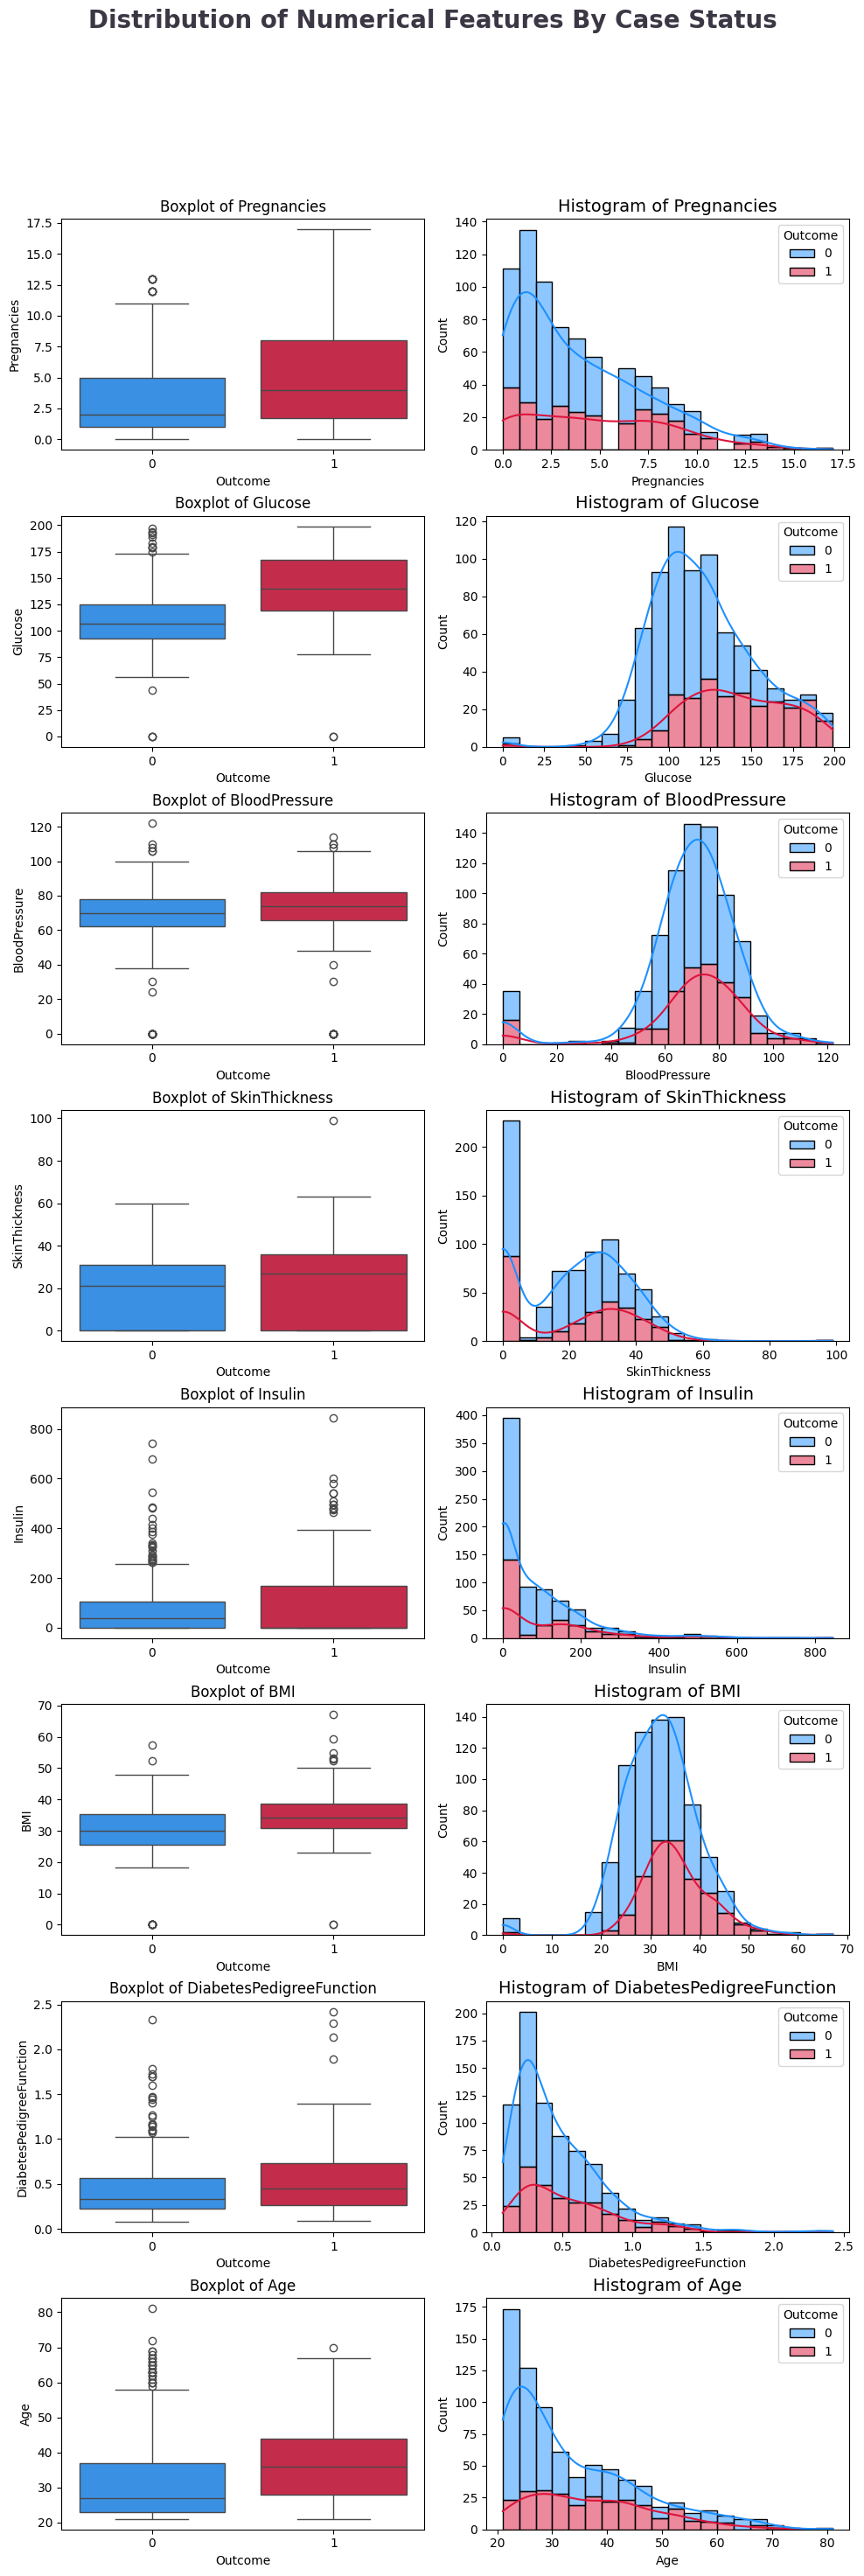

In [13]:
# Color palette for Outcome categories
clr1 = ['#1E90FF', '#DC143C']

# Set up the figure with subplots
fig, ax = plt.subplots(len(continues_features), 2, figsize=(10, 30))
fig.suptitle('Distribution of Numerical Features By Case Status', color='#3C3744', 
             fontsize=20, fontweight='bold', ha='center')

# Loop through the continuous features and plot
for i, col in enumerate(continues_features):   
    # Boxplot for each continuous feature
    sns.boxplot(data=df, x='Outcome', y=col, palette=clr1, ax=ax[i, 0])
    ax[i, 0].set_title(f'Boxplot of {col}', fontsize=12)
    
    # Histogram for each continuous feature
    sns.histplot(data=df, x=col, hue='Outcome', bins=20, kde=True, 
                 multiple='stack', palette=clr1, ax=ax[i, 1])
    ax[i, 1].set_title(f'Histogram of {col}', fontsize=14)

# Adjust layout
fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.show()

## Initial Analysis Report

1. **Pregnancies:**  
**Observation:** Diabetic individuals (Outcome = 1) tend to have higher pregnancy counts.  
 **Inference:** More pregnancies may be associated with increased diabetes risk, possibly due to gestational diabetes effects.

2. **Glucose:**  
**Observation:** Diabetic individuals have significantly higher glucose levels.  
**Inference:** Glucose is a strong predictor of diabetes — high glucose is clearly associated with positive cases.

3. **BloodPressure:**  
**Observation:** Distribution is relatively similar for both classes, with a slight upward shift in diabetics.  
**Inference:** Blood pressure might not be a strong standalone predictor but could contribute in combination with other features.

4. **SkinThickness:**  
**Observation:** Slightly higher median values in diabetics, but a lot of overlap between the classes.  
**Inference:** Weak discriminatory power; may still add value when combined with BMI or insulin.

5. **Insulin:**  
**Observation:** Highly skewed with outliers, diabetics tend to have slightly higher values.  
**Inference:** Insulin shows potential but is noisy and sparse; may need transformation (log/power) or imputation strategies.

6. **BMI:**  
**Observation:** Diabetics generally have higher BMI.  
**Inference:** BMI is moderately associated with diabetes risk and contributes useful predictive value.

7. **DiabetesPedigreeFunction:**  
**Observation:** Higher values are more frequent among diabetic individuals.  
**Inference:** Genetic predisposition (family history) has a measurable impact on diabetes likelihood.

8. **Age:**  
**Observation:** Diabetics are generally older; the median and upper quartile shift is clear.  
**Inference:** Age is a strong factor; the risk increases with age, especially after 35–40.

## 4. Visualization

### 4.1 Visualize the Target Feature

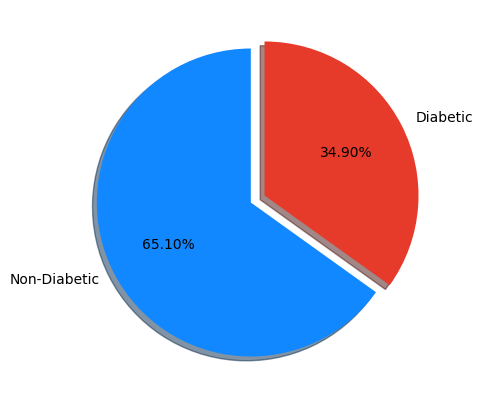

In [14]:
percentage = df.Outcome.value_counts(normalize=True)*100
labels = ["Non-Diabetic","Diabetic"]

# Plot PieChart with Ploty library
fig, ax = plt.subplots(figsize =(10, 5))
explode = (0, 0.1)
colors = ['#1188ff','#e63a2a']
ax.pie(percentage, labels = labels, startangle = 90,
       autopct='%1.2f%%',explode=explode, shadow=True, colors=colors)
plt.show()

# **Insights**

From the chart it is seen that the Target Variable is Imbalanced

Imbalanced data are types of data where the target class has an uneven distribution of observations, i.e Here Non-Diabetic value has more count than the Diabetic value of the dataset.